# The `Titanic` dataset

Go to the following `kaggle` webpage [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

If you don't have a `kaggle` account, create one.

Download the `train.csv` dataset.

Answer the following questions using the libraries `pandas`, `seaborn` and/or any other library that you like.
We expect you to produce **nice looking plots**, at least **readable** and perform the required computations
 as concisely as possible using the `pandas` API. This is the way we will evaluate this homework.

Before boarding on the homework, import (install them if needed)
the next modules.




In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pdpipe as pdp

import requests

import re
import os
from collections import namedtuple
from collections import abc
from statsmodels.graphics.mosaicplot import mosaic

sns.set_context("notebook", font_scale=1.2)

/usr/local/lib/python3.7/dist-packages/pdpipe/__init__.py:91: UserWarning: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pdpipe/__init__.py", line 79, in <module>
    from . import nltk_stages
  File "/usr/local/lib/python3.7/dist-packages/pdpipe/nltk_stages.py", line 16, in <module>
    import nltk
ModuleNotFoundError: No module named 'nltk'

  warnings.warn(tb)
/usr/local/lib/python3.7/dist-packages/pdpipe/__init__.py:93: UserWarning: pdpipe: nltk import failed. nltk-dependent  pipeline stages will not be loaded.
  "pdpipe: nltk import failed. nltk-dependent  pipeline "


The first thing to do is to read the description of
the columns and understand what the dataset is about and what it contains.

## Question : inspecting a DataFrame

Open the dataframe with `pandas`, check the first lines of the dataset

### Answer

In [2]:
data = pd.read_csv(os.path.join('.', 'train.csv'), sep=',')



Method `info`  print a a concise summary of a `DataFrame`.
With optional parameter `memory_usage`, you can get an estimate
of the amount of memory used by the `DataFrame`. Beware that
the resulting estimate depends on the argument fed.



In [3]:
data.info(memory_usage = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



## Question: Checking the types of columns

Check the types of the columns.

- How do you obtain the type of a column?
- How do you obtain the datatype (`dtype`) of elements of a column?

### Answer



In [4]:
print(type(data.PassengerId))

print(data.dtypes)


<class 'pandas.core.series.Series'>
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## Question: selecting columns according to datatype

Project (in the SQL sense)  the DataFrame on columns with a specified datatype.
For example, project (as in the SQL `SELECT`)
the Titanic `DataFrame` on the  numerical columns.

Hint: method `select_dtypes`

### Answer


In [5]:
typeNumber = data.select_dtypes(include = 'number')
print(typeNumber)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3   NaN      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[891 rows x 7 columns]



## Question: computing number of distinct values in each column

For each column with non-numerical datatype compute the number of unique values
in the column.

### Answer



In [6]:
typeNoNumber = data.select_dtypes(exclude = 'number')
countTNN = typeNoNumber.nunique()
print(countTNN)


Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64



## Question: spotting categorical columns

What are the indices and column names of columns
with less than `10` distinct vakues ?

### Answer



In [7]:
i = 1 #We start the indice at 1
for col in data.columns :
    if data[col].nunique() <= 10 :
        print(i,col)
    i = i+1
        

2 Survived
3 Pclass
5 Sex
7 SibSp
8 Parch
12 Embarked



## Question: coercing column datatypes

- `Name` should be of type `string`
- `Sex` is a categorical variable with values `Female, Male, None`
- `Embarked` is a categorical variable with values `Cherbourg, Southampton, ..., None`
- `Ticket` should be a string
- `Cabin` should be a string
- `Survived` should be of type `bool`
- `Pclass` is a categorical variable (ordered)
- `Sibsp` could a categorical variable (ordered)
- `Parch` could a categorical variable (ordered)

Attempt to automatically infer better types fails.




### Answer



In [8]:
data = data.infer_objects()
data.info()

#we can see it doesn't change anything, it's probably the default setting when loading a file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



## Question: coercing column datatypes

All suspicious columns could be converted to `category`.
Some of the categories have to be ordered.


### Answer


In [9]:
data['Sex'] = pd.Categorical(data.Sex)
data['Embarked'] = pd.Categorical(data.Embarked)
data['Pclass'] = pd.Categorical(data.Pclass, ordered = True)
data['SibSp'] = pd.Categorical(data.SibSp, ordered = True)
data['Parch'] = pd.Categorical(data.Parch, ordered = True)


## Question: categorizing columns using functions

Define a function that takes as arguments a `Dataframe` and a list of
of column names and attempts to cast the corresponding columns to 'category'.

### Answer




In [10]:
collist = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

def fun(df, l) :
    for col in l :
        df[col] = pd.Categorical(df[col])
    return df
        
data = fun(data,collist)


## Question: enforcing datatypes at loading time


Function `read_csv` from `Pandas` has many optional keyword arguments that
can be used to tweak the resulting `Dataframe` during (or just after load).

Improve your import of the data: for instance,
categorical columns (a column with a small number of modalities)
should have the `category` type.

### Answer


In [11]:
d_dtypes = {
    'Sex' : 'category',
    'Embarked' : 'category',
    'Pclass' : 'category',
    'SibSp' : 'category',
    'Parch' : 'category',
}

data = pd.read_csv(os.path.join('.', 'train.csv'), sep=',', dtype = d_dtypes)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Question: Count the number of missing values in each column

Display the distribution of `Pclass`  and `Cabin == NaN` in
the subpopulation defined by the missingness of `Age`.

Hint: you may use function `mosaic` from package `statsmodels`. See 
`from statsmodels.graphics.mosaicplot import mosaic`

### Answer

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('3',), (0.0, 0.0, 0.8397042235869157, 1.0)),
              (('2',), (0.8446547186364206, 0.0, 0.06266449429753103, 1.0)),
              (('1',), (0.9122697079834565, 0.0, 0.08773029201654345, 1.0))]))

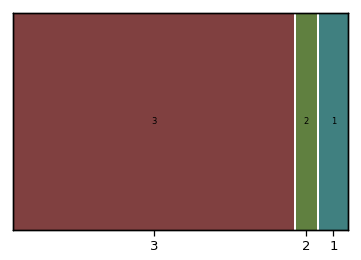

In [12]:
data_s = data[['Pclass','Cabin','Age']]
data_s = data_s[data_s['Age'].isna()]
data_s = data_s[data_s['Cabin'].isna()]

mosaic(data_s,['Pclass'])



## Question: number of missing values per row

It is also possible to determine the number of NA values per row.
List the rows with at least two missing values. Can you complete
some dots?

### Answer

In [13]:
data_srow =  len(data_s)
print(data_srow)


158




## Question: describe, showing quintiles

For each numerical column, show the *quintiles* (from $20\%$ up to $80\%$).

### Answer



In [14]:
data.quantile([.2, .8],numeric_only = True)

,PassengerId,Survived,Age,Fare
0.2,179.0,0.0,19.0,7.8542
0.8,713.0,1.0,41.0,39.6875




## Question: binning the `Age` column

Create a new categorical column named `Status`.

The value should be should depend on the `Age`
column with bins  `[0,17], (17, 40], (40, 60], (60, 100]`
(`np.nan` for passengers whose age is unknown).

### Answer




In [15]:
bins = [0, 17, 40, 60, 100]
data['Status'] = pd.cut(data['Age'], bins = bins)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(17.0, 40.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(17.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(17.0, 40.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(17.0, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(17.0, 40.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(17.0, 40.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(17.0, 40.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(17.0, 40.0]"



## Question: 

Draw a `countplot` for each categorical column, arrange the `countplot`s in a grid 
with two rows and three columns.

### Answer

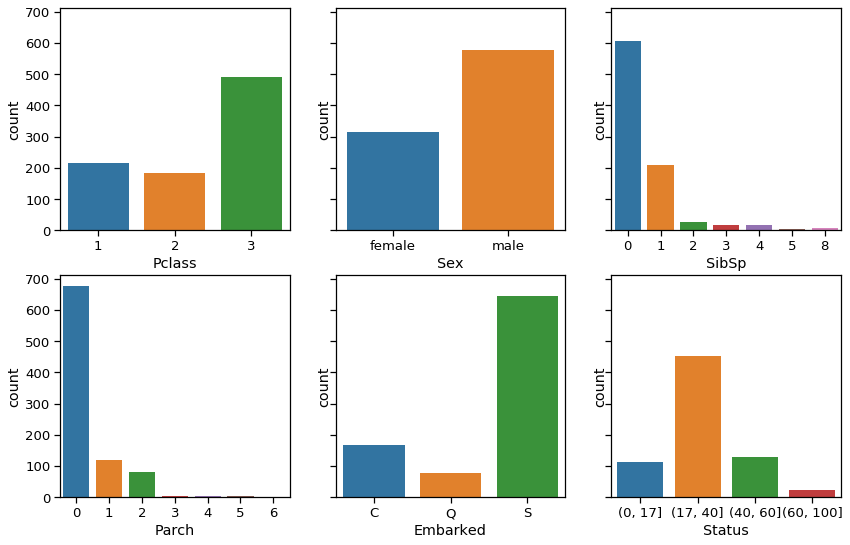

In [16]:
fig1, axes1 = plt.subplots(2,3, figsize = (14,9), sharey = True)
i = 0
axes1 = axes1.flatten()
for col in data.select_dtypes(include =['category']) :
    sns.countplot(x = col, data = data ,ax = axes1[i])
    i = i+1


## Question: plotting the distribution of numerical columns

For each column for which it makes sense, display its distribution using `seaborn`:
choose the most relevant type of plot for each column and display it.

**Remark.** Note that the `Age` column contains missing values:
show the number of missing / non-missing values in this column, and show the distribution of non-missing ages in a different plot.
Also, note that there is a `notna()` method for dataframes...

### Answer


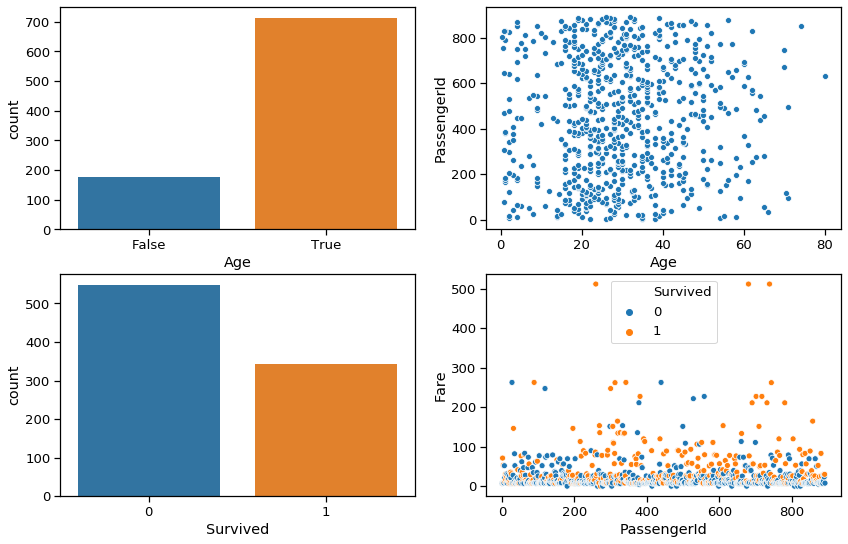

In [17]:
fig2, axes2 = plt.subplots(2,2, figsize = (14,9))
axes2 = axes2.flatten()
ncol =  data.select_dtypes(include = 'number')
sns.countplot(x = data['Age'].notna(), ax = axes2[0])
sns.scatterplot(x = data['Age'].dropna(), y = data['PassengerId'],ax = axes2[1])
sns.countplot(x = data['Survived'],ax= axes2[2])
sns.scatterplot(x = data['PassengerId'], y = data['Fare'], ax = axes2[3], hue = data['Survived'])



## Question: plot numerical columuns according to categorical columns

Do the same as in Question 4,
but **differentiate** the plots
for passengers the passengers that survived and the ones who did not.
You can use the `hue` option,
you can use a `FacetGrid`.
Look at the `seaborn` documentation and choose the best option.

### Answer

#### Facets



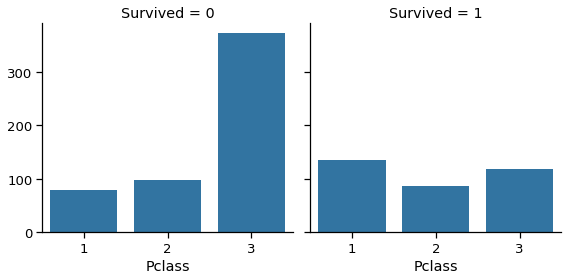

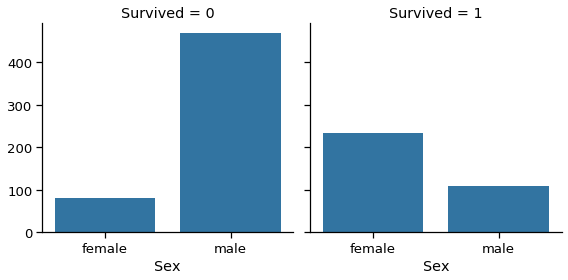

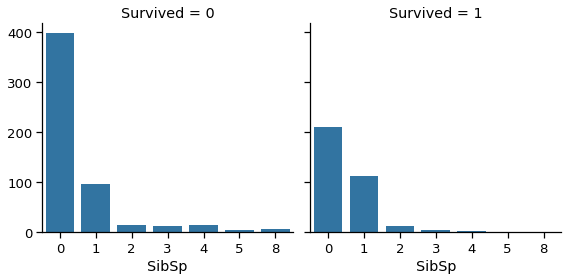

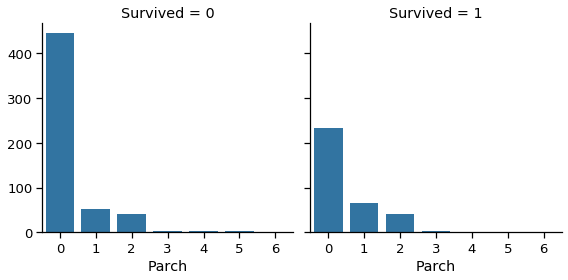

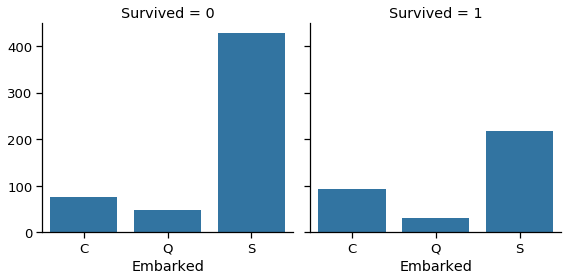

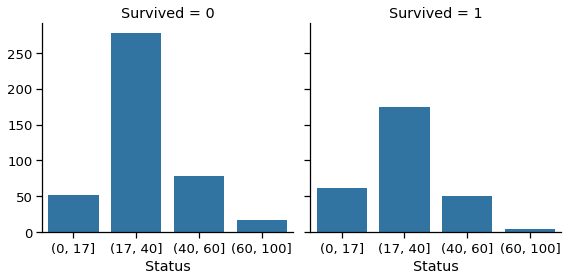

In [18]:
for col in data.select_dtypes(include =['category']) :
    g=sns.FacetGrid(data, col="Survived", height = 4) 
    g= g.map(sns.countplot, col, order = None)


#### Boxplot

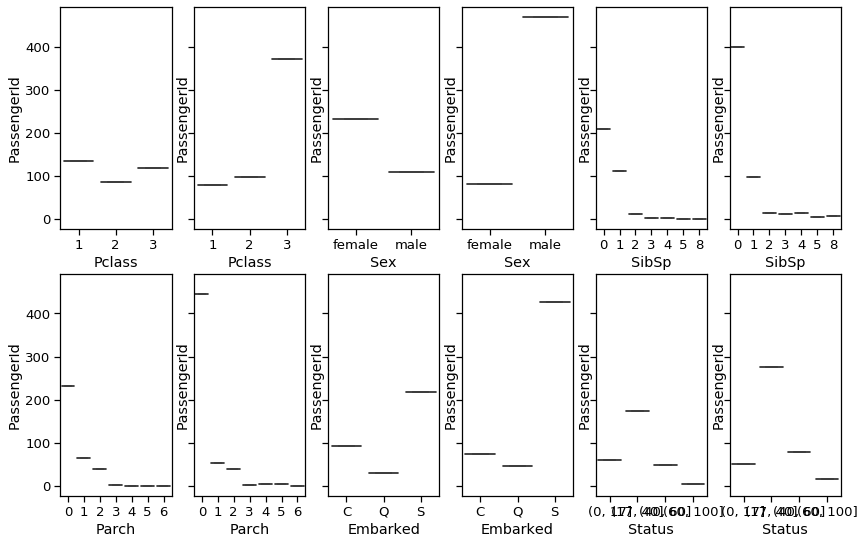

In [19]:
fig1, axes1 = plt.subplots(2,6, figsize = (14,9), sharey = True)
i = 0
axes1 = axes1.flatten()
for col in data.select_dtypes(include =['category']) :
    g=data.loc[data['Survived'] == 1].groupby(col,as_index=False).count()
    sns.boxplot(y = g['PassengerId'], x = g[col],ax = axes1[i])
    i = i+1
    g=data.loc[data['Survived'] == 0].groupby(col,as_index=False).count()
    sns.boxplot(y = g['PassengerId'], x = g[col],ax = axes1[i])
    i = i+1


#### Catplot

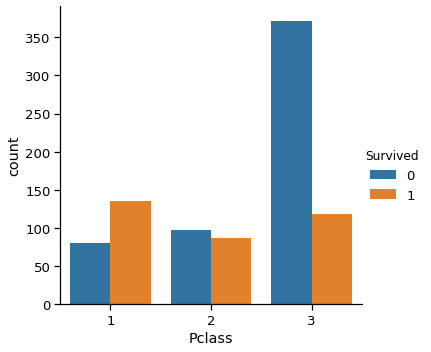

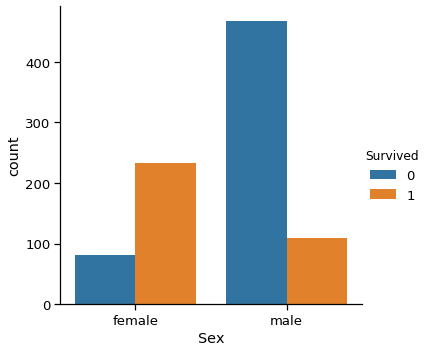

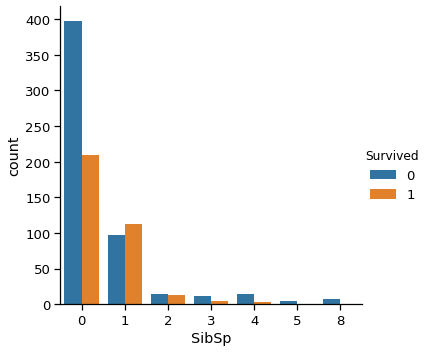

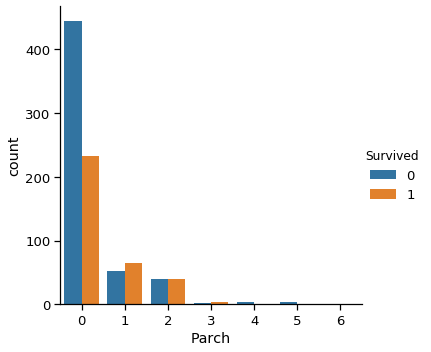

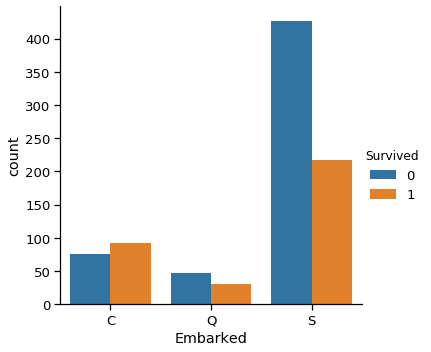

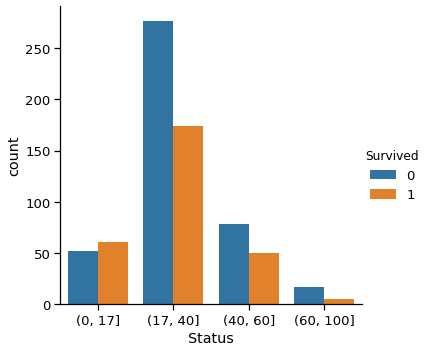

In [20]:
for col in data.select_dtypes(include =['category']) :
    sns.catplot(x = col, data = data,kind="count",hue='Survived')




## Question: categorical plots, barplots

The `Titanic`  dataset may be compared with datasets generated by
*surveys* (*questionnaires*). In such datasets, each row correspond
to an individual. An individual is described by *demographic* variables
and *attitudinal/response* variables. Here, `Age, Sex, Pclass, Embarked, ...`
are considered as demographic variables while `Survived` is
regarded as an attitudinal/response variable. It is desirable to plot the response
variable as a function of (some of) the demographic variables.
All variables are categorical.

### Answer



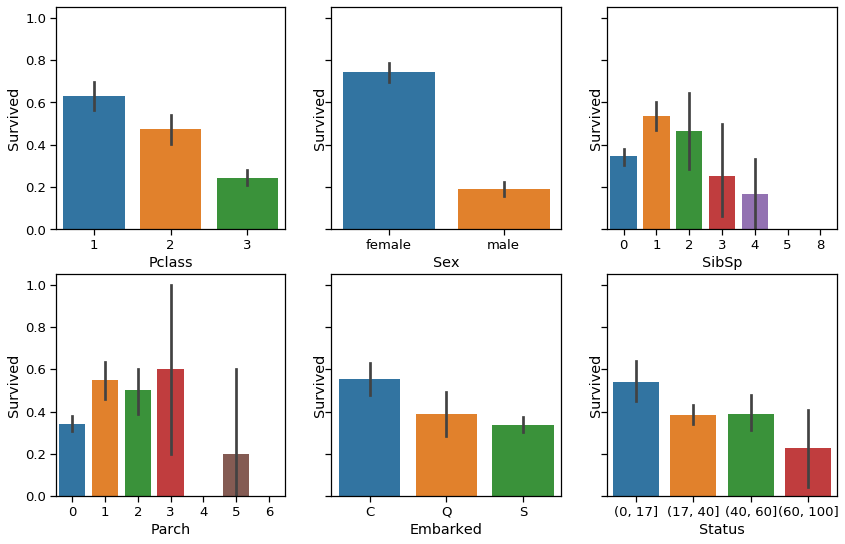

In [21]:
bar, axb = plt.subplots(2,3, figsize = (14,9), sharey = True)
i = 0
axb = axb.flatten()
for col in data.select_dtypes(include =['category']) :
    sns.barplot(x = col, data = data ,ax = axb[i], y = 'Survived')
    i = i+1


Barplots do not give us hints about the size of the different sub-populations.


## Question: categorical plots, mosaicplots



You have drawn a `boxplot` of `Age` with respect to passenger class (`Pclass`).
It would be nice to complement the plot with an indication of the number of missing values.
It would also make sense to indicate the number of individuals in each subsample.

Mosaicplot as delivered by module `statsmodels` is a very
powerful tool to visualize *contingency tables*.

A *two-way contingency table* and the associated `mosaicplot` reveal that
the passengers who boarded in the three harbors (Southampton, Cherbourg, Q)
did not buy the same kind of tickets. Half of the passengers embarked at Cherbourg
travelled first class while at most one fourth of the passengers embarked
at Southampton did.

### Answer



(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('3', 'S'), (0.0, 0.0, 0.5468375858958224, 0.7141797386061692)),
              (('3', 'C'),
               (0.0,
                0.7174909968843148,
                0.5468375858958224,
                0.13352935622664922)),
              (('3', 'Q'),
               (0.0,
                0.8543316113891098,
                0.5468375858958224,
                0.14566838861089004)),
              (('1', 'S'),
               (0.5517880809453274,
                0.0,
                0.23833654456559267,
                0.5895277588661261)),
              (('1', 'C'),
               (0.5517880809453274,
                0.5928390171442717,
                0.23833654456559267,
                0.3945658228631552)),
              (('1', 'Q'),
               (0.5517880809453274,
                0.9907160982855727,
                0.23833654456559267,
                0.009283901714427183)),
              (('2', 'S'),
               (0.795075120560

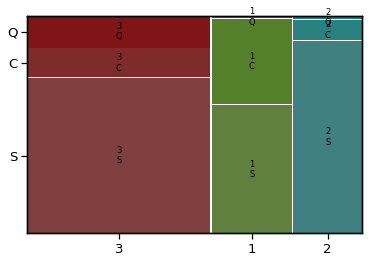

In [22]:
mosaic(data,['Pclass','Embarked'])


## Question: three-way mosaicplots

A three-way contingency illustrate the association between `Sex`, `Pclass`
and `Survived`.

### Answer



(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('male', '3', '0'),
               (0.0, 0.0, 0.5558528019356271, 0.5974037898699599)),
              (('male', '3', '1'),
               (0.5572815495080098,
                0.0,
                0.0870836056365816,
                0.5974037898699599)),
              (('male', '1', '0'),
               (0.0,
                0.6007150481481055,
                0.4057877326480334,
                0.2100382200695536)),
              (('male', '1', '1'),
               (0.40721648022041607,
                0.6007150481481055,
                0.23714867492417535,
                0.2100382200695536)),
              (('male', '2', '0'),
               (0.0,
                0.814064526495805,
                0.5417334545284351,
                0.18593547350419498)),
              (('male', '2', '1'),
               (0.5431622021008178,
                0.814064526495805,
                0.10120295304377361,
                0.18593547350419498))

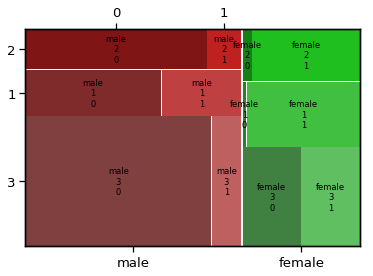

In [23]:
mosaic(data,['Sex','Pclass','Survived'])


## Question: roommates

For each passenger, compute the number of passengers in the same cabin (including himself).
Add a column called `Roommates` that contain this information.
When the cabin information is missing, then the `Roommates` is missing as well.
You will need to use `groupby` and `join` operations.



**Warning.** You should not `reset_index` after the `groupby` operation if you `join` with the resulting dataframe.


We may proceed by projecting on columns
`PassengerId,  and `Cabin` while filtering (selecting) the rows
where `Cabin` is available. This is the `df_cabin` dataframe below.





- Plot `Roommates` according to `Pclass`
- Plot `Roommates` according to `Embarkment`
- Plot `Roommates` according to `Sex`

### Answer

In [24]:
Roommates = data[['PassengerId','Cabin']].groupby(['Cabin'],as_index = False).count()
Roommates.columns = ['Cabin','Roommates']
data = data.join(Roommates.set_index('Cabin'), on='Cabin')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Roommates
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(17.0, 40.0]",NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(17.0, 40.0]",1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(17.0, 40.0]",NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(17.0, 40.0]",2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(17.0, 40.0]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(17.0, 40.0]",NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(17.0, 40.0]",1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(17.0, 40.0]",1.0




## Question: plotting  `RoomMates` column.


### Answer



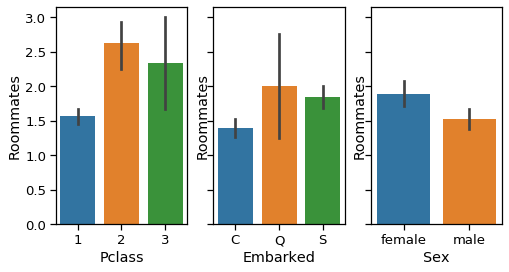

In [25]:
rm, axrm = plt.subplots(1,3, figsize = (8,4), sharey = True)
i = 0
plotCol = ['Pclass','Embarked','Sex']
for col in plotCol :
    sns.barplot(x = col, y = 'Roommates', data = data ,ax = axrm[i])
    i = i+1




## Question: surviving together

Is there a cabin where some passengers survived while others did not?


### Answer



In [26]:
a=data.loc[data['Survived'] == 0].groupby('Cabin',as_index=False).count()
b=data.loc[data['Survived'] == 1].groupby('Cabin',as_index=False).count()
n=data.groupby('Cabin',as_index=False).count()
#we have 61 rows on a which represents the number of Cabins which contained at least a survivor
#we have 101 rows on b which represents the number of Cabins which contained at least a person who died
#we have 147 rows on n which represents the number of Cabins in total
#it means we some cabins that belong to both a and b 
#which means there cabins where some passengers survived and others did not



## Question: Missing `Cabin`  value and `Age`


The `Cabin` column is `NaN` for many rows, how are
those missing data distributed acrross the classes?

Plot the age distribution with
respect to the availability of the `Cabin` column (`Cabin.isna()`).

### Answer


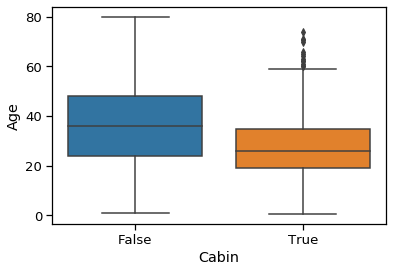

In [27]:
sns.boxplot(y = data['Age'], x = data['Cabin'].isna())



## Question: Milking the `Name` column

Column `Name` gathers different kind of information pertaining
to a passenger: name, civility,
and given name(s). For some female passengers, the apparent given names
are actually the husband's name and the maidens name is indicated between
parentheses.

The information contained in the `Name` column Has to be extracted in a proper way:
The string should be into three parts: the first one containing the name,
the second one containing the civility  and, the last one
possibly containing given names or given names plus maiden names. Passing is
facilitated by the next observation: the name is followed by a comma, the
civility is followed by a period. You may use regular expressions
as providede by  module `re`  or module `regex`.


- Split the information contained in `Name` into three columns `Name`, `Given_names`, and `Civility`.
- Go one step further. Extract the *maiden name* and actual *given names* when information available.

At the end of the day, column `Name` should contain the *maiden name* for married female passengers
Column `Given_Names` should contain the real given names of the passenger, not the ones of the spouse.

To learn more about Regular Expressions see the documentation
of the [`re` module](https://docs.python.org/3/library/re.html#module-re)
and the tutorial [Howto](https://docs.python.org/3/howto/regex.html#regex-howto)

Understand the difference between a `string` and a `raw string`.



In [28]:
print(r"\n is not a newline", "\nis a newline\n", "\\\\n is not a newline\n")


\n is not a newline 
is a newline
 \\n is not a newline




### Answer



In [60]:
def parse_name(s):
    """Parse name field in Titanic data frame.

    ACHTUNG: there are some outliers with given names containing parenthsized items. Some people travelled under pseudonyms (see [Henry Samuel Morley](https://www.encyclopedia-titanica.org/titanic-victim/henry-samuel-morley.html)).
    """
    s = re.split(r', |\. ',s)
    name = [s[0]]
    civility =  [s[1]]
    given_names = [s[2]]
    s = re.split(r' \(|\)',s[2])
    if len(s) >= 2 : 
        Spouse_name = [s[0]]
        Maiden_name = [s[1]]
    else :
        Spouse_name = None
        Maiden_name = None
    
    return {'Name': name,
            'Civility': civility,
            'Given_names': given_names,
            'Spouse_name': Spouse_name,
            'Maiden_name': Maiden_name}

stre1 = 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
stre2 = 'Braund, Mr. Owen Harris'
print(parse_name(stre1))
print(parse_name(stre2))


{'Name': ['Futrelle'], 'Civility': ['Mrs'], 'Given_names': ['Jacques Heath (Lily May Peel)'], 'Spouse_name': ['Jacques Heath'], 'Maiden_name': ['Lily May Peel']}
{'Name': ['Braund'], 'Civility': ['Mr'], 'Given_names': ['Owen Harris'], 'Spouse_name': None, 'Maiden_name': None}



## Question: about `map` objects

What is a `map object`? Is it a sequence (list, tuple, etc)? Is it
an `Iterable`? Something else? You may use function `isinstance` and
submodule `collections.abc` to settle these questions?

### Answer



In [63]:
from collections.abc import Iterable
print(isinstance(map,list))
print(isinstance(map,tuple))
print(isinstance(map,dict))
print(isinstance(map,Iterable))

False
False
False
False
False



## Question: aristocrats on board

Some passengers were of noble extraction, or officers in some Army.
Point them.

### Answer



In [49]:
splitDfName = data['Name'].apply(parse_name)
dfName = pd.DataFrame()
for c in splitDfName:
    dfName = dfName.append(pd.DataFrame.from_dict(c),ignore_index = True)

title = dfName[['Name','Civility']].groupby('Civility', as_index = False).count()
unusualTitle = title[title['Name'] <= 10]
unusualTitle
#As unusual titles, we have Capt, Col, Don, Dr, Jonkheer, Lady, Major,Mlle, Mme, Ms, Rev, Sir, the countess

,Civility,Name
0,Capt,1
1,Col,2
2,Don,1
3,Dr,7
4,Jonkheer,1
5,Lady,1
6,Major,2
9,Mlle,2
10,Mme,1
13,Ms,1



## Question: How many people are given Civility 'Mrs', 'Miss', 'Mr', 'Master'?


### Answer



In [50]:
#We have 125 Mrs, 182 Miss, 517 Mr, and 40 Master
title[title['Civility'].isin(['Mrs','Miss','Mr','Master'])]


,Civility,Name
7,Master,40
8,Miss,182
11,Mr,517
12,Mrs,125



ACHTUNG: there are some outliers with given names containing parenthsized items. Some people travelled under pseudonyms (see [Henry Samuel Morley](https://www.encyclopedia-titanica.org/titanic-victim/henry-samuel-morley.html)).





## Question:  For each embarkment and sex, visualize the survival ratio.


### Answer



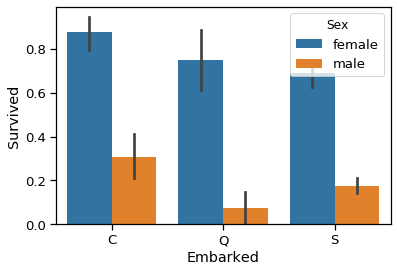

In [33]:
sns.barplot(x = 'Embarked', data = data, y = 'Survived', hue = 'Sex')


## Question: for each `Pclass` and `Sex`, visualize the survival ratio,

### Answer



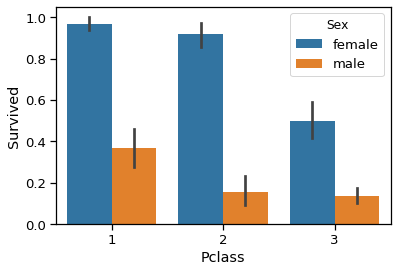

In [34]:
sns.barplot(x = 'Pclass', data = data , y = 'Survived', hue = 'Sex')



## Question: compute pairwise correlations between numerical columns.


### Answer



In [58]:
data.select_dtypes(include = 'number').corr()


,PassengerId,Survived,Age,Fare,Roommates
PassengerId,1.000000,-0.005007,0.036847,0.012658,-0.140576
Survived,-0.005007,1.000000,-0.077221,0.257307,0.127383
Age,0.036847,-0.077221,1.000000,0.096067,-0.366885
Fare,0.012658,0.257307,0.096067,1.000000,0.132166
Roommates,-0.140576,0.127383,-0.366885,0.132166,1.000000




## Pandas and SQL

A systematic comparison between Pandas and SQL querying can be found
at
[https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html)


## Pandas pipeliness

Loading and transforming datasets is a cumbersome task. It is very likely that
the sequence of transformations you have performed on the `train.csv`  dataset will
be carried out on other datasets (just think about `test.csv`). For the sake of
reproducibility, it is convenient to build a *transformation pipeline*.
The `pipe` method for `DataFrame` class provides us with a means to do that.

Pipelining DataFrame methods is easy, it is enough to write:



In [35]:
# df.meth1(arg11, arg12)\
#   .meth2(arg21)\
#   .meth3(arg31, arg32, arg33)\
#   ...



### `pipe` method for class `DataFrame`


The `pipe` method allows us to chain transformations implemented by functions.
Pipelining ordinary functions can be done using the `pipe` method of
class `DataFrame`.





### Module `pdpipe`

Module [`pdpipe`](https://pdpipe.github.io/pdpipe/) is more ambitious.

A *transformation pipeline* defines a sequence of operations that should be applied
to a dataframe. In the `pdpipe` framework, it is an instance of class `pdpipe.PdPipeLine`





## Question: use `pdpipe`

Build a pipeline of transformatioms
using the [pdpipe](https://pdpipe.github.io/pdpipe/doc/pdpipe/) module.

### Answer





## Miscellanea

Browse the `seaborn` documentation in order to make up your
mind on the following questions.

1. What is a *hue*?
1. Is the *colorPalette* part of style?
1. What is a saturation channel?
1. What is a saturation channel made for?
1. What is an *aesthetic parameter*?
1. What is the type of `seaborn.FacetGrid`?




In [59]:
#1.In seaborn, the hue parameter determines which column in the data frame should be used for colour encoding.
#2.No
#3.A saturation channel is a channel for saturation handling
#4.They were made for handling intensity of colors
#5.An aesthetic parameter is a parameter whiwh allows us to change the visuals when rendering the plot.
#6.Graphics